In [15]:
from my_utils import Utils,AllStainUtils
import torch
import os
os.environ['NEURITE_BACKEND'] = 'pytorch'
os.environ['VXM_BACKEND'] = 'pytorch'
import voxelmorph as vxm
import matplotlib.pyplot as plt
import glob
import re
import csv
from tifffile import imwrite
import numpy as np
from PIL import Image

In [2]:
moving='/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set06/GCA112TIA/Registered/GCA112TIA_DAPI_DAPI_12ms_ROUND_19.tif'
fixed='/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set06/GCA112TIA/Registered/GCA112TIA_DAPI_DAPI_30ms_ROUND_00.tif'
mask='/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set06/GCA112TIA/Registered/GCA112TIA_RetentionMask.tif'
moving,fixed=AllStainUtils.load_tissues_for_overlap(moving,fixed,mask)

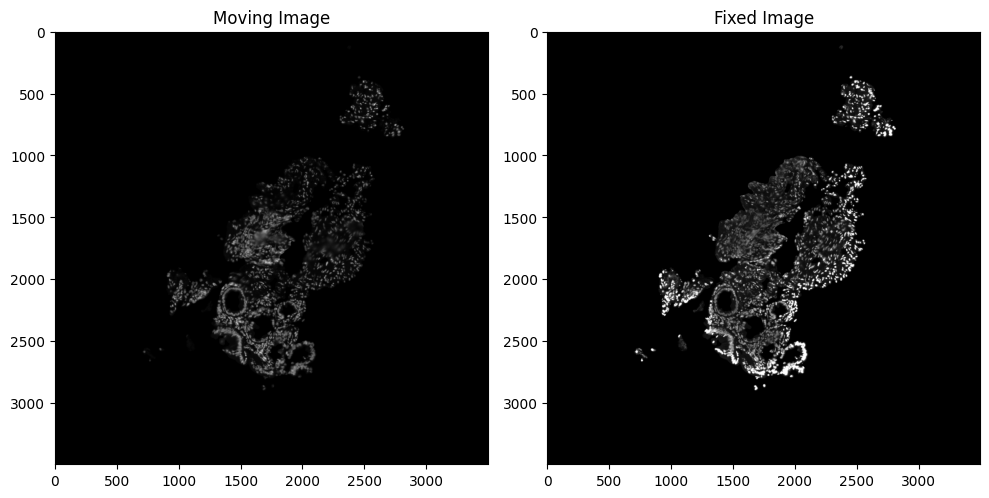

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the moving image
axes[0].imshow(moving, cmap='gray')
axes[0].set_title('Moving Image')

# Plot the fixed image
axes[1].imshow(fixed, cmap='gray')
axes[1].set_title('Fixed Image')

plt.tight_layout()
plt.show()

In [4]:
moving.shape

(3496, 3496)

In [5]:
np.max(moving),np.max(fixed)    

(0.85490197, 1.0)

In [6]:
np.min(moving),np.min(fixed)    

(0.0, 0.0)

In [19]:
model_path='/home-local/rudravg/test_DAPI/1024_Dataset_V2/trial2_epochs/epoch_72/epoch_72.pth'
model,device=Utils.load_model(model_path)

In [20]:
registered_tissue=AllStainUtils.register_tissues_with_overlap(moving,fixed,model,device)

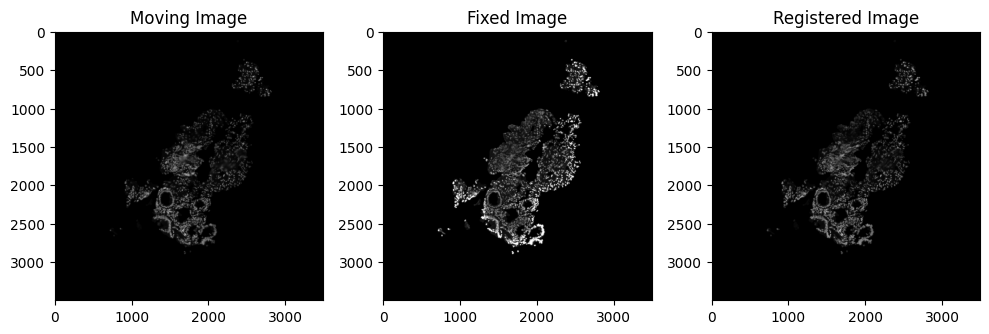

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Plot the moving image
axes[0].imshow(moving, cmap='gray')
axes[0].set_title('Moving Image')

# Plot the fixed image
axes[1].imshow(fixed, cmap='gray')
axes[1].set_title('Fixed Image')

axes[2].imshow(registered_tissue, cmap='gray')
axes[2].set_title('Registered Image')

plt.tight_layout()
plt.show()

In [22]:
Utils.calculate_ncc(moving.ravel(),fixed.ravel())

array([0.8050551], dtype=float32)

In [23]:
Utils.calculate_ncc(registered_tissue.ravel(),fixed.ravel())

array([0.90825033], dtype=float32)

In [24]:
registered_tissue=AllStainUtils.register_tissues_with_overlap(moving,fixed,model,device)

In [25]:
image = Image.fromarray(registered_tissue)
image1=Image.fromarray(fixed)
image2=Image.fromarray(moving)
# Save the image as a TIFF file
image.save('/home-local/rudravg/test_DAPI/registered_tissue_latest.tif')
image1.save('/home-local/rudravg/test_DAPI/fixed_tissue_latest.tif')
image2.save('/home-local/rudravg/test_DAPI/moving_tissue_latest.tif')